In [ ]:
from custom_classes_defs.preprocessing import *

Concatenate the original files of the seistrain/faulttrain into one big file (original dataset)

In [41]:
folder_path = "data_download/fault_train"
files = os.listdir(folder_path)
file_contents_list = []

for file_name in files:
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.isfile(file_path):
        file_contents = np.load(file_path)
        file_contents_list.append(file_contents)

# Concatenate the arrays into one big array
#combined_array = np.concatenate(file_contents_list, axis=0)
#np.save("combined_faulttrain.npy", combined_array)
#np.savez_compressed('compressed_data.npz', combined_array)


-------------
Re-order the file in IL,Z,XL and normalization and save them as npz files,  
after concatenate all into one big file

In [4]:
def prepare_reorder(input_f1, input_f2, output_folder):
    # Get a list of all files in the input folder
    seismicfiles = os.listdir(input_f1)
    faultfiles = os.listdir(input_f2)
    
    for file_name in seismicfiles:
        print(file_name)
        path = os.path.join(input_f1+file_name)
        seismic = np.load(path)
        # re-order IL,Z and XL
        seismic = np.moveaxis(seismic,-2,-1)
        # normalization step - make the range (0,1)in axis 1 and 2 direction
        seismic = (seismic-seismic.min(axis=(1,2), keepdims=True))/(seismic.max(axis=(1,2), keepdims=True)-seismic.min(axis=(1,2), keepdims=True))
        output_path = os.path.join(output_folder, file_name[:-4] + '_re.npz')
        #np.save(output_path, seismic)
        np.savez_compressed(output_path, seismic)
    
    for file_name in faultfiles:
        print(file_name)
        path = os.path.join(input_f2+file_name)
        fault = np.load(path)
        fault = np.moveaxis(fault,-2,-1)
        output_fault_path = os.path.join(output_folder, file_name[:-4] + '_re.npz')
        #np.save(output_fault_path, fault)
        np.savez_compressed(output_fault_path, fault)

In [20]:
input_folder ='data_download/temp/seis_temp/'
input_fault  = 'data_download/temp/fault_temp/'
output_folder = 'data_download/temp/output'

#prepare_reorder(input_folder,input_fault,output_folder)

seistrain7.npy
seistrain8.npy
seistrain9.npy
faulttrain7.npy
faulttrain8.npy
faulttrain9.npy


load all the npz files

In [3]:
folder_path = 'data_download/temp/seis_temp/'

# List all files in the folder
files = os.listdir(folder_path)
print(files)

['seistest1_re.npz', 'seistest2_re.npz', 'seistest3_re.npz', 'seistest4_re.npz', 'seistest5_re.npz', 'seistest6_re.npz', 'seistest7_re.npz']


In [8]:
# Load NPZ file
#data = np.load('data_download/temp/seis_temp/faulttrain1_re.npz')

# Concatenate or combine arrays in numpy
#fault_array = np.concatenate([data[key] for key in data.keys()], axis=0)

# Save the combined array as an NPZ file
# np.save('faulttrain1_re.npy', fault_array)


now combine files into one big file


In [55]:
def load_npz(input_folder):
    # print all files in the folder
    files = os.listdir(input_folder)
    print(files)
    combine_seismic =[]
    
    for file_name in files:
        print(file_name)
        path = os.path.join(input_folder+file_name)
        seismic = np.load(path)
        # Concatenate or combine arrays
        arrays = np.concatenate([seismic[key] for key in seismic.keys()], axis=0)
        combine_seismic.append(arrays)
        
    # Concatenate the arrays into one big array
    combined_array = np.concatenate(combine_seismic, axis=0)
    np.save('data_download/temp/seis_temp/combined_seistrain_re.npy', combined_array)

In [56]:
load_npz(folder_path)

['seistrain1_re.npz', 'seistrain2_re.npz', 'seistrain3_re.npz', 'seistrain4_re.npz', 'seistrain5_re.npz', 'seistrain6_re.npz', 'seistrain7_re.npz', 'seistrain8_re.npz', 'seistrain9_re.npz']
seistrain1_re.npz
seistrain2_re.npz
seistrain3_re.npz
seistrain4_re.npz
seistrain5_re.npz
seistrain6_re.npz
seistrain7_re.npz
seistrain8_re.npz
seistrain9_re.npz


-------------

In [5]:
t_start = time.time()

# load training set

seismic_path = 'data_download/combined_seistrain_re.npy'
label_path = 'data_download/combined_faulttrain_re.npy'

seismic = np.load(seismic_path)
fault = np.load(label_path)
t_end = time.time()

print("Data loading :", t_end- t_start, "secs")
print(seismic.shape)
print(fault.shape)

Data loading : 65.07822275161743 secs
(900, 1537, 3174)
(900, 1537, 3174)


In [6]:
print(seismic.max(),seismic.min(), fault.max(), fault.min())

1.0 0.0 True False


In [11]:
IL, Z, XL = fault.shape

im_height = Z
im_width = XL
splitsize = 96
stepsize = 48
overlapsize = splitsize-stepsize
pixelThre = int(0.03*splitsize*splitsize) # pixel threshold sets as 3% of total number of pixels
print(pixelThre)

276


In [12]:
horizontal_splits_number = int(np.ceil((im_width-overlapsize)/stepsize))
print("horizontal_splits_number", horizontal_splits_number)
width_after_pad = stepsize*horizontal_splits_number+overlapsize
print("width_after_pad", width_after_pad)
left_pad = int((width_after_pad-im_width)/2)
right_pad = width_after_pad-im_width-left_pad
print("left_pad,right_pad",left_pad,right_pad)

vertical_splits_number = int(np.ceil((im_height-overlapsize)/stepsize))
print("vertical_splits_number",vertical_splits_number)
height_after_pad = stepsize*vertical_splits_number+overlapsize
print("height_after_pad",height_after_pad)
top_pad = int((height_after_pad-im_height)/2)
bottom_pad = height_after_pad-im_height-top_pad
print("top_pad,bottom_pad", top_pad,bottom_pad)

horizontal_splits_number 66
width_after_pad 3216
left_pad,right_pad 21 21
vertical_splits_number 32
height_after_pad 1584
top_pad,bottom_pad 23 24


In [14]:
t_start = time.time()
X = []   # seismic
Y = []   # fault
for i in range(0,900,1):
    mask = fault[i]
    splits = split_Image(mask, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
#     print(splits.shape)
    t = (splits.sum((1,2)) < pixelThre)
    no_label_element_index = list(compress(range(len(t)), t))
    # get all the indexes of the no label pieces by adding elements in axis 2 and 3.
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
#     print("splits.shape", splits.shape)
    Y.extend(splits)
    
    img = seismic[i]
    splits = split_Image(img, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
#     print("splits.shape", splits.shape)
    X.extend(splits)
#     break

print(len(Y))
print(len(X))
print(X[0].shape)
print("read images in {} sec".format(time.time()-t_start))

181029
181029
(96, 96)
read images in 278.8198833465576 sec


In [15]:
print(X[0].dtype)
X = np.asarray(X, dtype=np.float32)
Y = np.asarray(Y, dtype=np.float32)
print(X[0].dtype)

float64
float32


In [20]:
# check if the folder is ready to save the patches

directory = "data_download/processed_patches/seismic/train"
if not os.path.exists(directory):
    os.makedirs(directory)
directory = "data_download/processed_patches/fault/train"
if not os.path.exists(directory):
    os.makedirs(directory)

In [21]:
processed_data = 'data_download/processed_patches'

In [22]:
for i in range(len(X)):
    np.save("{}/seismic/train/{}.npy".format(processed_data, i),X[i])
    np.save("{}/fault/train/{}.npy".format(processed_data, i),Y[i])

---------
validation dataset preparation

In [23]:
folder_path = 'data_download/seis_val'

# List all files in the folder
files = os.listdir(folder_path)
print(files)


['seisval1.npy', 'seisval2.npy']


In [24]:
input_folder ='data_download/temp/seis_temp/'
input_fault  = 'data_download/temp/fault_temp/'
output_folder = 'data_download/temp/output'

prepare_reorder(input_folder,input_fault,output_folder)

seisval1.npy
seisval2.npy
faultval1.npy
faultval2.npy


In [30]:
folder_path = 'data_download/temp/fault_temp/'

# List all files in the folder
files = os.listdir(folder_path)
print(files)


['faultval1_re.npz', 'faultval2_re.npz']


In [32]:
def load_npz(input_folder):
    # print all files in the folder
    files = os.listdir(input_folder)
    print(files)
    combine_seismic =[]
    
    for file_name in files:
        print(file_name)
        path = os.path.join(input_folder+file_name)
        seismic = np.load(path)
        # Concatenate or combine arrays
        arrays = np.concatenate([seismic[key] for key in seismic.keys()], axis=0)
        combine_seismic.append(arrays)
        
    # Concatenate the arrays into one big array
    combined_array = np.concatenate(combine_seismic, axis=0)
    np.save('data_download/temp/fault_temp/combined_faultval_re.npy', combined_array)

In [33]:
load_npz(folder_path)

['faultval1_re.npz', 'faultval2_re.npz']
faultval1_re.npz
faultval2_re.npz


In [51]:
t_start = time.time()

# load validation set

seismic_path = 'data_download/combined_seisval_re.npy'
label_path = 'data_download/combined_faultval_re.npy'

seismic = np.load(seismic_path)
fault = np.load(label_path)

t_end = time.time()
print("Data loading :", t_end- t_start, "secs")
print(seismic.shape)
print(fault.shape)

Data loading : 9.374779224395752 secs
(200, 1537, 3174)
(200, 1537, 3174)


In [36]:
print(seismic.max(),seismic.min(), fault.max(), fault.min())

1.0 0.0 True False


In [37]:
t_start = time.time()
X = []
Y = []
for i in range(0,200,1):
    mask = fault[i]
    splits = split_Image(mask, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
#     print(splits.shape)
    t = (splits.sum((1,2)) < pixelThre)
    no_label_element_index = list(compress(range(len(t)), t))
    # get all the indexes of the no label pieces by adding elements in axis 2 and 3.
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
#     print("splits.shape", splits.shape)
    Y.extend(splits)
    
    img = seismic[i]
    splits = split_Image(img, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
    X.extend(splits)

print(len(Y))
print(len(X))
print(X[0].shape)
print("read images in {} sec".format(time.time()-t_start))

64317
64317
(96, 96)
read images in 18.106667518615723 sec


In [38]:
X = np.asarray(X, dtype=np.float32)
Y = np.asarray(Y, dtype=np.float32)

In [39]:
# check if the folder is ready to save the patches

directory = "data_download/processed_patches/seismic/val"
if not os.path.exists(directory):
    os.makedirs(directory)
directory = "data_download/processed_patches/fault/val"
if not os.path.exists(directory):
    os.makedirs(directory)

In [40]:
processed_data = 'data_download/processed_patches'
for i in range(len(X)):
    np.save("{}/seismic/val/{}.npy".format(processed_data, i),X[i])
    np.save("{}/fault/val/{}.npy".format(processed_data, i),Y[i])

---------
Test dataset preparation

In [41]:
input_folder ='data_download/temp/seis_temp/'
input_fault  = 'data_download/temp/fault_temp/'
output_folder = 'data_download/temp/output'

prepare_reorder(input_folder,input_fault,output_folder)

seistest1.npy
seistest2.npy
seistest3.npy
seistest4.npy
seistest5.npy
seistest6.npy
seistest7.npy
faulttest1.npy
faulttest2.npy
faulttest3.npy
faulttest4.npy
faulttest5.npy
faulttest6.npy
faulttest7.npy


In [4]:
folder_path = 'data_download/temp/seis_temp/'

# List all files in the folder
files = os.listdir(folder_path)
print(files)

['seistest1_re.npz', 'seistest2_re.npz', 'seistest3_re.npz', 'seistest4_re.npz', 'seistest5_re.npz', 'seistest6_re.npz', 'seistest7_re.npz']


In [47]:
def load_npz(input_folder):
    # print all files in the folder
    files = os.listdir(input_folder)
    print(files)
    combine_seismic =[]
    
    for file_name in files:
        print(file_name)
        path = os.path.join(input_folder+file_name)
        seismic = np.load(path)
        # Concatenate or combine arrays
        arrays = np.concatenate([seismic[key] for key in seismic.keys()], axis=0)
        combine_seismic.append(arrays)
        
    # Concatenate the arrays into one big array
    combined_array = np.concatenate(combine_seismic, axis=0)
    np.save('data_download/temp/seis_temp/combined_seistest_re.npy', combined_array)

In [48]:
load_npz(folder_path)

['seistest1_re.npz', 'seistest2_re.npz', 'seistest3_re.npz', 'seistest4_re.npz', 'seistest5_re.npz', 'seistest6_re.npz', 'seistest7_re.npz']
seistest1_re.npz
seistest2_re.npz
seistest3_re.npz
seistest4_re.npz
seistest5_re.npz
seistest6_re.npz
seistest7_re.npz


In [5]:
t_start = time.time()

# load test set
seismic_path = 'data_download/combined_seistest_re.npy'
label_path = 'data_download/combined_faulttest_re.npy'

seismic = np.load(seismic_path)
fault = np.load(label_path)

t_end = time.time()
print("Data loading :", t_end- t_start, "secs")
print(seismic.shape)
print(fault.shape)

Data loading : 55.88553428649902 secs
(703, 1537, 3174)
(703, 1537, 3174)


In [6]:
print(seismic.max(),seismic.min(), fault.max(), fault.min())

1.0 0.0 True False


In [ ]:
t_start = time.time()
X = []   # seismic
Y = []   # fault
for i in range(0,703,1):
    mask = fault[i]
    splits = split_Image(mask, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
#     print(splits.shape)
    t = (splits.sum((1,2)) < pixelThre)
    no_label_element_index = list(compress(range(len(t)), t))
    # get all the indexes of the no label pieces by adding elements in axis 2 and 3.
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
#     print("splits.shape", splits.shape)
    Y.extend(splits)
    
    img = seismic[i]
    splits = split_Image(img, True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number)
    splits = np.delete(splits, no_label_element_index,0) # delete element i along axis 0
#     print("splits.shape", splits.shape)
    X.extend(splits)
#     break

print(len(Y))
print(len(X))
print(X[0].shape)
print("read images in {} sec".format(time.time()-t_start))

In [15]:
# check if the folder is ready to save the patches

directory = "data_download/processed_patches/seismic/test"
if not os.path.exists(directory):
    os.makedirs(directory)
directory = "data_download/processed_patches/fault/test"
if not os.path.exists(directory):
    os.makedirs(directory)

In [16]:
processed_data = 'data_download/processed_patches'
for i in range(len(X)):
    np.save("{}/seismic/test/{}.npy".format(processed_data, i),X[i])
    np.save("{}/fault/test/{}.npy".format(processed_data, i),Y[i])

In [58]:
#processed_data = 'data_download/processed_patches'

# split the test data (0,703) with the step of 5, generating 140 patches

#count = 0
#for i in range(0,len(seismic),5):
#    np.save("{}/seismic/test/{}.npy".format(processed_data, count),seismic[i])
#    np.save("{}/fault/test/{}.npy".format(processed_data, count),fault[i])
#    count = count + 1

--------------
visualize the patches (training, validation,test)

In [7]:
processed_data = 'data_download/processed_patches'

(-0.5, 95.5, 95.5, -0.5)

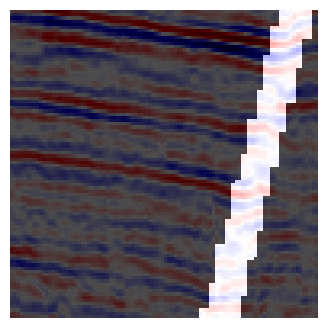

In [18]:
i = 1000
seis = np.load("{}/seismic/val/{}.npy".format(processed_data, i))
mask = np.load("{}/fault/val/{}.npy".format(processed_data, i))
plt.figure(figsize=(4,4))
plt.imshow(seis,'seismic')
plt.imshow(mask, 'gray', alpha=0.7)
plt.axis('off')

(-0.5, 95.5, 95.5, -0.5)

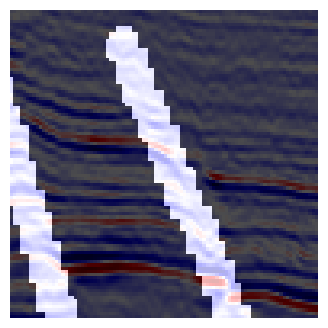

In [63]:
i = 233
seis = np.load("{}/seismic/train/{}.npy".format(processed_data, i))
mask = np.load("{}/fault/train/{}.npy".format(processed_data, i))
plt.figure(figsize=(4,4))
plt.imshow(seis,'seismic')
plt.imshow(mask, 'gray', alpha=0.7)
plt.axis('off')

(-0.5, 95.5, 95.5, -0.5)

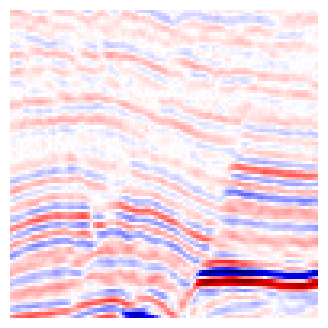

In [31]:
i = 1000
seis = np.load("{}/seismic/test/{}.npy".format(processed_data, i))
mask = np.load("{}/fault/test/{}.npy".format(processed_data, i))
plt.figure(figsize=(4,4))
plt.imshow(seis,'seismic')
#plt.imshow(mask, 'gray', alpha=0.7)
plt.axis('off')